In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
random_state = np.random.seed(42)
plt.style.use("seaborn")

In [5]:
def plot_intrxn_histograms(dfs, model_info):
    # for every 10 timesteps plot line in different color
    fig, ax = plt.subplots(1, 4, figsize=(20,5))
    
    timesteps = dfs[0].shape[0]
    # idxs = [(0,0), (0,1), (1,0), (1,1)]
    idxs = [0,1,2,3]
    for i, df in enumerate(dfs):
        items = np.arange(df.shape[1])
        for j in range(10, timesteps+1, 10):
            counts = df.loc[j]
            ax[idxs[i]].plot(items, sorted(counts), label=f't={j}')

        ax[idxs[i]].legend()
        ax[idxs[i]].set_title(f"{model_info[i][0]} Interaction Histogram")
        ax[idxs[i]].set_xlabel('Items')
        ax[idxs[i]].set_ylabel('No. of Interactions')
        ax[idxs[i]].legend()
        
    plt.savefig('figures/intrxn_histogram_analysis.png')

In [ ]:
model_info = [
    ('cosine_sim','artefacts/supplementary/measurements/cosine_sim_interaction_histogram_10trainTimesteps_100runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp_0.1Lambda.csv'),
    ('entropy','artefacts/supplementary/measurements/entropy_interaction_histogram_10trainTimesteps_100runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp_0.1Lambda.csv'),
    ('top_k_reranking','artefacts/supplementary/measurements/top_k_reranking_interaction_histogram_10trainTimesteps_100runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp.csv'),
    ('myopic','artefacts/supplementary/measurements/myopic_interaction_histogram_10trainTimesteps_100runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp.csv')
]

# paths
dfs_intrxn_hist = []
for i in model_info:
    df = pd.read_csv(i[1])
    dfs_intrxn_hist.append(df)

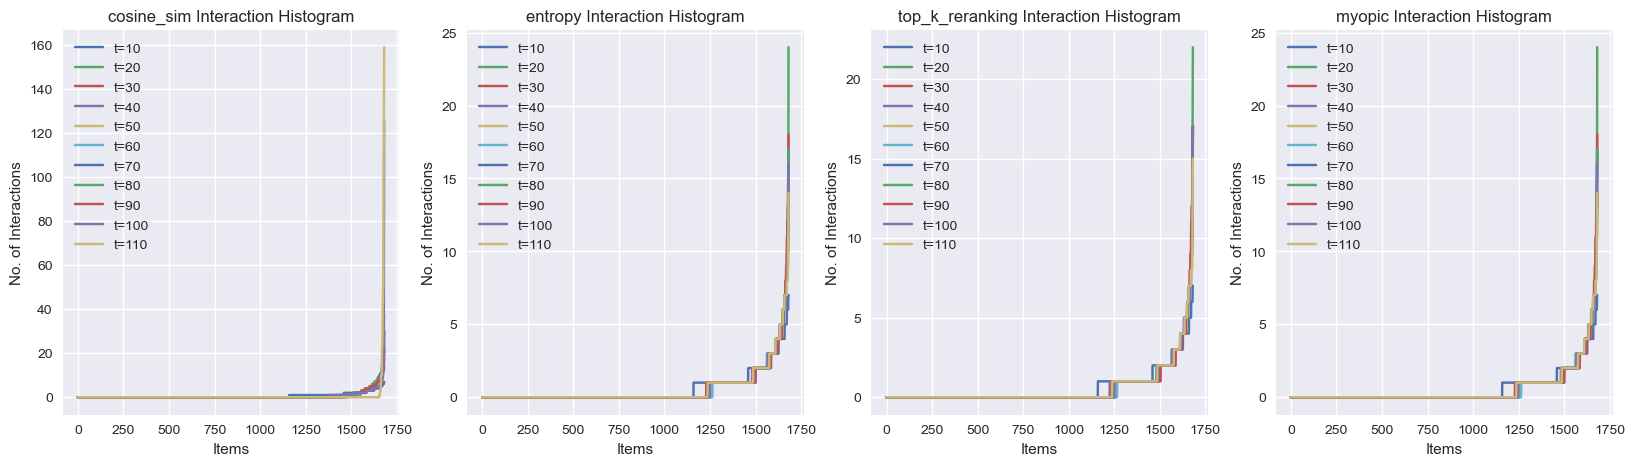

In [ ]:
plot_intrxn_histograms(dfs_intrxn_hist, model_info)